# Data Visualizations

### CA1 - 2023

### Ayllin Bukovic - 2023003

This project aims to analize a dataset based on board games from a retail company. This analysis will help determine the sales strategy for the company in their upcoming Winter season.   
First we import the necesary libraries:

In [1]:
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

import warnings
warnings.filterwarnings('ignore')

### Part 1

In [2]:
df = pd.read_csv('board_games.csv')
df.head(5)

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,NaN,Ancient,NaN,Christian Beierer,NaN,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,NaN,Sid Sackson,NaN,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195


In [3]:
df.shape

(10532, 22)

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

In [5]:
df_games=df.drop(columns=["game_id","description","image","thumbnail","artist","compilation",
                    "designer","expansion","family","publisher"])

In [6]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   max_players     10532 non-null  int64  
 1   max_playtime    10532 non-null  int64  
 2   min_age         10532 non-null  int64  
 3   min_players     10532 non-null  int64  
 4   min_playtime    10532 non-null  int64  
 5   name            10532 non-null  object 
 6   playing_time    10532 non-null  int64  
 7   year_published  10532 non-null  int64  
 8   category        10438 non-null  object 
 9   mechanic        9582 non-null   object 
 10  average_rating  10532 non-null  float64
 11  users_rated     10532 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 987.5+ KB


In [7]:
df_games.isna().sum()

max_players         0
max_playtime        0
min_age             0
min_players         0
min_playtime        0
name                0
playing_time        0
year_published      0
category           94
mechanic          950
average_rating      0
users_rated         0
dtype: int64

In [8]:
df_games.duplicated().sum()

0

In [9]:
df_games["category"].fillna(value="No Category", inplace=True)


In [10]:
df_games["mechanic"].fillna(value="No Mechanic", inplace=True)

In [11]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   max_players     10532 non-null  int64  
 1   max_playtime    10532 non-null  int64  
 2   min_age         10532 non-null  int64  
 3   min_players     10532 non-null  int64  
 4   min_playtime    10532 non-null  int64  
 5   name            10532 non-null  object 
 6   playing_time    10532 non-null  int64  
 7   year_published  10532 non-null  int64  
 8   category        10532 non-null  object 
 9   mechanic        10532 non-null  object 
 10  average_rating  10532 non-null  float64
 11  users_rated     10532 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 987.5+ KB


In [12]:
order_columns = ['name', 'average_rating', 'category', 'max_playtime','min_playtime','playing_time','min_age', 
             'min_players','max_players','mechanic', 'users_rated','year_published']
df_games=df_games[order_columns]
df_games

,name,average_rating,category,max_playtime,min_playtime,playing_time,min_age,min_players,max_players,mechanic,users_rated,year_published
0,Die Macher,7.66508,"Economic,Negotiation,Political",240,240,240,14,3,5,"Area Control / Area Influence,Auction/Bidding,...",4498,1986
1,Dragonmaster,6.60815,"Card Game,Fantasy",30,30,30,12,3,4,Trick-taking,478,1981
2,Samurai,7.44119,"Abstract Strategy,Medieval",60,30,60,10,2,4,"Area Control / Area Influence,Hand Management,...",12019,1998
3,Tal der Könige,6.60675,Ancient,60,60,60,12,2,4,"Action Point Allowance System,Area Control / A...",314,1992
4,Acquire,7.35830,Economic,90,90,90,12,3,6,"Hand Management,Stock Holding,Tile Placement",15195,1964
...,...,...,...,...,...,...,...,...,...,...,...,...
10527,"Silver Bayonet: The First Team in Vietnam, 196...",8.35333,"Vietnam War,Wargame",480,30,480,12,1,2,Hex-and-Counter,75,2016
10528,Codex: Card-Time Strategy – Core Set,8.08780,"Card Game,Fantasy,Fighting,Video Game Theme",45,45,45,13,2,5,"Deck / Pool Building,Hand Management,Variable ...",82,2016
10529,Wind the Film!,7.28016,Card Game,20,20,20,12,2,4,"Hand Management,Set Collection",63,2016
10530,Robo Rally (2016),7.45871,"Miniatures,Racing,Science Fiction",120,20,120,12,2,6,"Action / Movement Programming,Grid Movement,Mo...",341,2016


#### 1. What are the top 5 “average rated” games?  

In [13]:
top5=df_games.sort_values(by="average_rating", ascending=False)
top_5=top5.head(5)
top_5

,name,average_rating,category,max_playtime,min_playtime,playing_time,min_age,min_players,max_players,mechanic,users_rated,year_published
8348,Small World Designer Edition,9.00392,"Civilization,Fantasy,Territory Building",80,40,80,8,2,6,"Area Control / Area Influence,Area Movement,Di...",180,2015
6392,Kingdom Death: Monster,8.93184,"Adventure,Fantasy,Horror,Mature / Adult,Miniat...",180,60,180,17,1,6,"Co-operative Play,Dice Rolling,Grid Movement,R...",1954,2015
9964,Terra Mystica: Big Box,8.84862,"Civilization,Economic,Fantasy,Territory Building",150,60,150,12,2,5,"Route/Network Building,Variable Player Powers",109,2015
8526,Last Chance for Victory,8.84603,"American Civil War,Civil War,Wargame",60,60,60,15,2,2,"Dice Rolling,Hex-and-Counter",88,2014
9675,"The Greatest Day: Sword, Juno, and Gold Beaches",8.83081,"Wargame,World War II",6000,60,6000,12,2,8,Chit-Pull System,86,2015


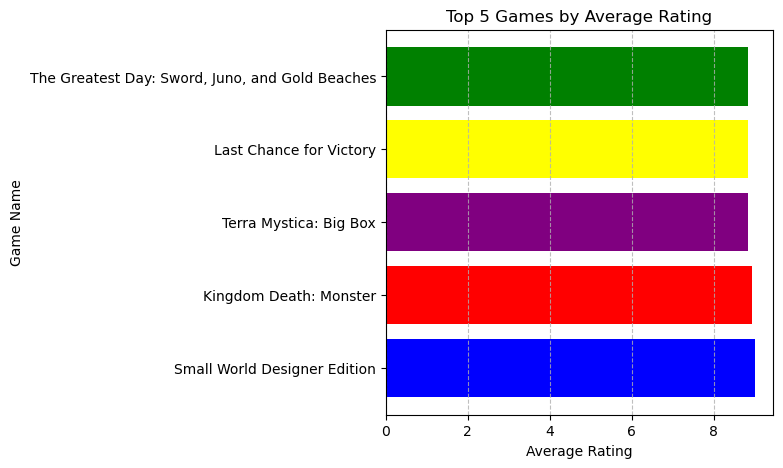

In [14]:
plt.figure(figsize=(5,5))

plt.barh(top_5["name"],top_5["average_rating"],color=["blue","red","purple","yellow","green"])
plt.xlabel("Average Rating")
plt.ylabel("Game Name")
plt.title("Top 5 Games by Average Rating")
plt.grid(axis='x', linestyle='--', alpha=0.8)


#### 2. Is there a correlation between the “users_rated” and the “max_playtime”?  

In [33]:
df_games[["users_rated","max_playtime"]].corr()

,users_rated,max_playtime
users_rated,1.000000,-0.004342
max_playtime,-0.004342,1.000000


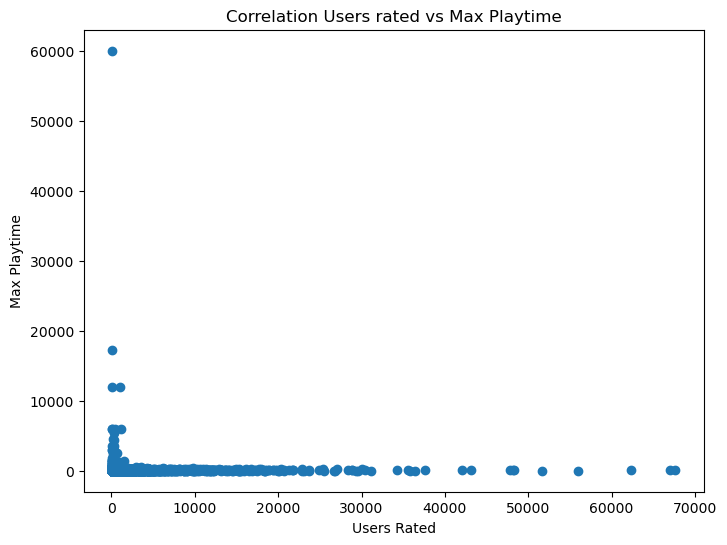

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(x="users_rated", y="max_playtime", data=df_games)
plt.title("Correlation Users rated vs Max Playtime")
plt.xlabel("Users Rated")
plt.ylabel("Max Playtime");

The tread is not clear at all, so we can say that both variables are not correlated

#### 3. What is the distribution of game categories? (You may not use a barchart)

#### Do older games (1992 and earlier) have a higher MEDIAN “average rating” than newer games (after 1992)?  

#### What are the 5 most common “mechanics” in the dataset?  